# 6.5

#### 1. Install and import all necessary libraries in your Jupyter notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This command propts matplotlib visuals to appear in the notebook.
%matplotlib inline

#### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

In [3]:
# Making a path.
path = r'/Users/terencekeys/Downloads/Shawzz Folder/Data Analytics Immersion Files/Achievement 6 Data Sets/Chocolate Data Sets'

In [4]:
# Importing chocolate ratings cleaned 1 data set.
choc_ratg_clnd1 = pd.read_csv(os.path.join(path, 'Changed', 'chocolate_ratings_cleaned1.csv'), index_col=0) 

In [5]:
choc_ratg_clnd1

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Region,Num_of_Ingredients
0,2454,5150,United States,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"rich cocoa, fatty, bready",3.25,Other,3
1,2458,5150,United States,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"cocoa, vegetal, savory",3.50,Other,3
2,2454,5150,United States,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"cocoa, blackberry, full body",3.75,Other,3
3,2542,5150,United States,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"chewy, off, rubbery",3.00,Other,3
4,2546,5150,United States,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"fatty, earthy, moss, nutty,chalky",3.00,Other,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"waxy, cloying, vegetal",2.75,Other,4
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"strong nutty, marshmallow",3.75,Other,3
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"fatty, earthy, cocoa",3.00,Other,3
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"fatty, mild nuts, mild fruit",3.25,Other,3


Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

In [6]:
# Dropping categorical columns (non numerical) from my chocolate ratings dataframe.
choc_ratg_dropped = choc_ratg_clnd1.drop(columns = ['Company (Manufacturer)', 'Company Location', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Ingredients', 'Most Memorable Characteristics', 'Region'])
choc_ratg_dropped

,REF,Review Date,Cocoa Percent,Rating,Num_of_Ingredients
0,2454,2019,76.0,3.25,3
1,2458,2019,76.0,3.50,3
2,2454,2019,76.0,3.75,3
3,2542,2021,68.0,3.00,3
4,2546,2021,72.0,3.00,3
...,...,...,...,...,...
2525,1205,2014,80.0,2.75,4
2526,1996,2017,75.0,3.75,3
2527,2036,2018,75.0,3.00,3
2528,2170,2018,70.0,3.25,3


Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

#### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [7]:
# Defines the range of potential clusters in the data.
num_of_cl = range(1, 10)
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_of_cl] 

In [8]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(choc_ratg_dropped).score(choc_ratg_dropped) for i in range(len(kmeans))] 
score

/Users/terencekeys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terencekeys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terencekeys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/terencekeys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[-1451848171.396369,
 -385349374.0181171,
 -168486026.73576334,
 -96523019.74112998,
 -60277795.24888731,
 -41952450.286880955,
 -30856874.6334406,
 -24128232.018693544,
 -18992249.61573916]

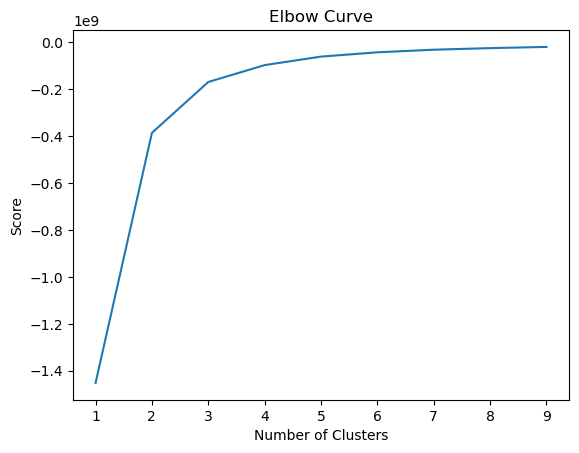

In [9]:
# Plot the elbow curve using PyLab.
pl.plot(num_of_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

**Explain why you chose that number.**

I will use 3 clusters, because from what the chart showed in the elbow curve 3 is the point where it starts to level out.

#### 5. Run the k-means algorithm.

In [10]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [11]:
# Fit the k-means object to the data.
kmeans.fit(choc_ratg_dropped)

/Users/terencekeys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

#### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [12]:
choc_ratg_dropped['clusters'] = kmeans.fit_predict(choc_ratg_dropped)

/Users/terencekeys/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
choc_ratg_dropped

,REF,Review Date,Cocoa Percent,Rating,Num_of_Ingredients,clusters
0,2454,2019,76.0,3.25,3,1
1,2458,2019,76.0,3.50,3,1
2,2454,2019,76.0,3.75,3,1
3,2542,2021,68.0,3.00,3,1
4,2546,2021,72.0,3.00,3,1
...,...,...,...,...,...,...
2525,1205,2014,80.0,2.75,4,2
2526,1996,2017,75.0,3.75,3,1
2527,2036,2018,75.0,3.00,3,1
2528,2170,2018,70.0,3.25,3,1


In [15]:
# Exporting chocolate ratings dropped.
choc_ratg_dropped.to_csv(os.path.join(path, 'Changed', 'chocolate_ratings_dropped.csv'))

In [16]:
# Checking the value counts of clusters column.
choc_ratg_dropped['clusters'].value_counts()

2    891
1    867
0    772
Name: clusters, dtype: int64

#### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

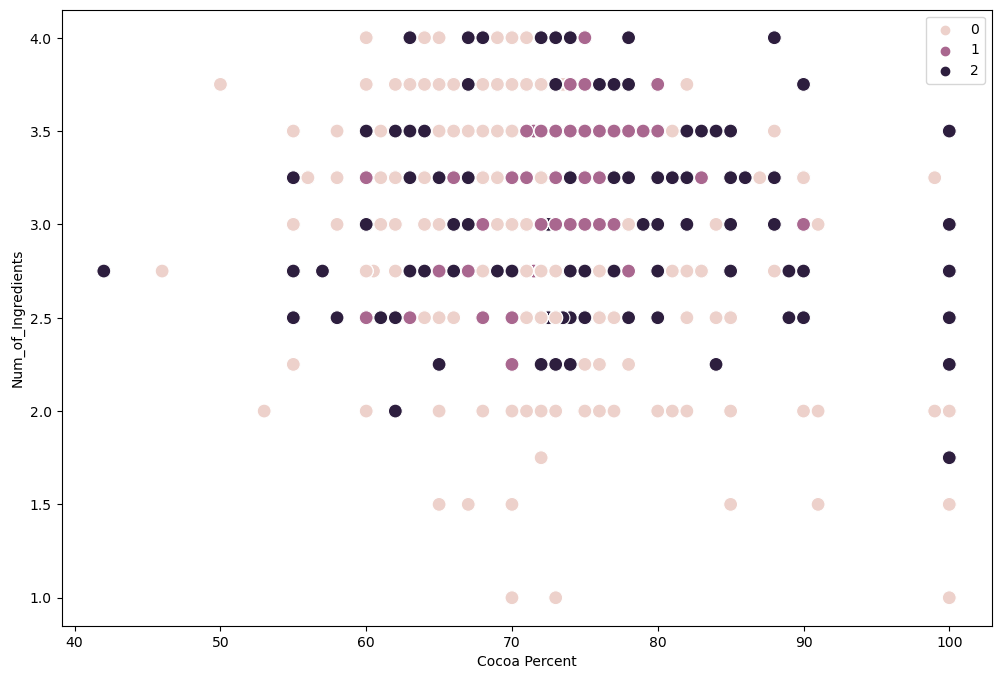

In [17]:
# Plot the clusters for the 'Cocoa Percent' and 'Rating' variables.
plt.figure(figsize=(12,8))
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax = sns.scatterplot(x=choc_ratg_dropped['Cocoa Percent'], y=choc_ratg_dropped['Rating'], hue=kmeans.labels_, s=100)
# This removes the grid from the background.
ax.grid(False) 
# Label x-axis.
plt.xlabel('Cocoa Percent') 
# Label y-axis.
plt.ylabel('Num_of_Ingredients')
plt.show()

In [18]:
choc_ratg_dropped.loc[choc_ratg_dropped['clusters'] == 2, 'cluster'] = 'dark purple'
choc_ratg_dropped.loc[choc_ratg_dropped['clusters'] == 1, 'cluster'] = 'purple'
choc_ratg_dropped.loc[choc_ratg_dropped['clusters'] == 0, 'cluster'] = 'pink'

#### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

**Note down your thoughts.**

The clusters makes sense because I figured there would be the most clustering between the 60 and 80% of Cocoa Percent and between 2 and 4 of Num_of_Ingredients. 

But I'm not sure why the Y-axis -- Num_of_Ingredients only goes up to 4 ingredients when there are up to 6 different types of ingredients.

#### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [19]:
# Calculating the descriptive statistics for my clusters (mean, median).
choc_ratg_dropped.groupby('cluster').agg({'REF':['mean', 'median'],
                                          'Review Date':['mean', 'median'],
                                          'Cocoa Percent':['mean', 'median'],
                                          'Rating':['mean', 'median']})

REF          Review Date         Cocoa Percent         \
                    mean  median         mean  median          mean median   
cluster                                                                      
dark purple  1404.208754  1415.0  2014.308642  2014.0     72.139731   70.0   
pink          506.308290   508.0  2009.594560  2010.0     71.248705   70.0   
purple       2278.403691  2278.0  2018.697809  2019.0     71.474048   70.0   

               Rating         
                 mean median  
cluster                       
dark purple  3.212121   3.25  
pink         3.126619   3.00  
purple       3.242215   3.25

**The 'REF' and 'Review Date' doesn't really matter in this case.**

As for 'Cocoa Percent' and 'Rating', the median is exactly where I thought it would be. It is right in the middle of 60% and 80% and between the 2 and 4 ratings. For the mean I would say it is pretty accurate, there are a few more pinks than dark purples but more dark purples than purples. So I would say this descriptive statistics chart is accurate. But it is still a little hard to understand, maybe if there were more columns of data to compare, since the 'REF' and 'Review Date' columns don't really matter, which only leaves the two columns --Cocoa Percent and Rating-- left.

#### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

For future steps of an analysis these results could be useful for steps that need means and medians or descriptive statistics to get more insight into the data.